# Impedance of RLC Circuits Expressed with Complex Numbers

## Capacitive Reactance

The time varying charging voltage $V_C(t)$ leads to a time varying charge displacement $Q(t)$ (aka "the charge") in the capacitor:

$$
\bbox[15px, border: 2px solid black]
{
Q(t) = CV_C(t)
}
$$





Capacitor charge and voltage:
$$
Q = CV_C  \Leftrightarrow V_C =\frac{1}{C}Q = \frac{1}{C}\int I_L(t)dt
$$

Assumption: (Co-)Sinusoidal charge voltage:

$$
V_C(t) = V_0\cos(\omega t) = \mathrm{Re}\left(V_0e^{i\omega t}\right)
$$

Simplify: Calculate with complex numbers and extract the real part after having done all calulations. The given (co-)sinusoidal charging voltage reads:

$$
\bbox[15px, border: 2px solid black]
{
V_C(t) = V_0e^{i\omega t}
}
$$

### Calculation of the Current ###

The current $I_C(t)$ is the rate of change of the charge displacement $\dot{Q}(t)$:

$$
I_C(t) = \dot{Q}(t) = C\dot{V_C}(t) = i \omega C V_C(t) 
= e^{i\pi/2}  \omega C V_0 e^{i\omega t} 
= \omega C V_0 e^{i\left(\omega t+\pi/2\right)}
$$

The current in a capacitor resulting from an externcal voltage source, summarized:

$$
\bbox[15px, border: 2px solid black]
{
I_C(t) = \omega C V_0\,e^{\mathrm{i} ( \omega t+\pi/2 ) } 
= I_{C,0}(\omega,C)\,e^{i\left(\omega t+\pi/2\right)}
}
$$

When a sinusoidal excitation voltage $V_C(t)$ with a constant amplitude $V_0$ is connected to a capacitor then **the current $I(t)$ is leading the the voltage** by a phase difference of $+\pi/2$. 

**In a CAPACITOR: 
<br>The voltage $V_C(t)$ is lagging the current $I_C(t)$ by a phase difference of $-\pi/2$,
<br>i.e. a quarter of a full oscillation period.**

The concept of AC impedance $Z$ is an extension of the DC resistance $R$. The extended Ohm's law reads:

$$
 V(t) = ZI(t)
$$

The temporally constant impedance consists of a purely real resistance $R$ and a purely imaginary reactance $X$ (e.g. caused by a capacitor or inductor):

$$
Z = R + X \\
R \in \mathcal{R} \\
X \in \mathcal{I}
$$

The **Capacitive Reactance** is purely imaginary. It **increases** with frequency:

$$
\bbox[15px, border: 2px solid black]
{
X_C = \frac{V_C(t)}{I_C(t)} = \frac{1}{ i \omega C} = -i\frac{1}{\omega C}
}
$$

## Inductive Reactance

The voltage across an inductor (e.g. coil or solenoid) subjected to an alternating current is:

$$
\bbox[15px, border: 2px solid black]
{
V_L = L\dot{I}_L
}
$$

$$
I_L(t) = \frac{1}{L} \int V_L(t') dt'
$$

Assumption: pure inductance, no parasitic resistance: 

$$
\bbox[15px, border: 2px solid black]
{
V_L(t) = V_0e^{i\omega t}
}
$$

$$
\int V_L(t') dt' = \frac{1}{i\omega} V_L(t) + c
$$

No DC offset: $c=0$.

$$
\Rightarrow I_L(t) = \frac{1}{i\omega L} V_0e^{i\omega t} = -i \frac{1}{\omega L} V_0e^{i\omega t} = \frac{1}{\omega L} V_0\, e^{i(\omega t - \pi/2)} = I_{L,0}\, e^{i(\omega t - \pi/2)}
$$

The current in an inductor connected to an external voltage source, summarized:

$$
\bbox[15px, border: 2px solid black]
{
I(t) = \frac{1}{\omega L} V_0\, e^{i(\omega t - \pi/2)} = I_{L,0}(\omega,L)\, e^{i(\omega t - \pi/2)}
}
$$

When a sinusoidal excitation voltage $V_L(t)$ with a constant amplitude $V_0$ is connected to an inductor then **the current $I_L(t)$ is lagging behind the the voltage** by a phase difference of $-\pi/2$. 

**In an INDUCTOR: 
<br>The voltage $V_L(t)$ is leading the current $I_C(t)$ by a phase difference of $+\pi/2$,
<br>i.e. a quarter of a full oscillation period.**


The **Inductive Reactance** is purely imaginary. It **decreases** with frequency:



$$
\bbox[15px, border: 2px solid black]
{
X_L = \frac{V_L(t)}{I(t)} =  i \omega L
}
$$

## Let's use numpy and matplotlib to investigate! 

In [1]:
import numpy as np
from numpy import pi, sin, cos, exp, real, imag, abs, angle
import matplotlib.pyplot as plt
from ipywidgets import interactive

## Set Calculation Parameters

In [2]:
# t = np.arange(-1.,1.0001,0.001)

# f = 1. # Hz
# omega = 2*pi*f

# V0 = 1. # Excitation voltage
# C = 1. # Farad
# L = 1. # Henry

## Calculate the Capacitive Reactance $X_C$  ##

In [3]:
# Sinusoidal excitation voltage in complex notation.
def fVC(t,V0=1.,omega=2*np.pi,phi=0.):
    return V0*np.exp(1j*(omega*t+phi))

# Capacitive reactance
def fXC(C=1.,omega=1.):
    return (1/(1j*omega*C))

## Interactive Plot: Capacitor's V(t) and I(t) 

**Text and Annotations: See Jake VanderPlas!**

https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html

In [4]:
# The equations V(t), I(I) as Latex string with symboles only, without values.
VCtext_eqn = r"$V_C(t) = V_0\,\exp(\mathrm{i}\omega t)$"
ICtext_eqn = r"$I_C(t) = \omega C V_0\,\exp(\mathrm{i}\omega t + \mathrm{i}\pi/2)$"

print(VCtext_eqn)
print(ICtext_eqn)

$V_C(t) = V_0\,\exp(\mathrm{i}\omega t)$
$I_C(t) = \omega C V_0\,\exp(\mathrm{i}\omega t + \mathrm{i}\pi/2)$


In [5]:
# create dynamic Latex text for voltage formula using exp(...) 
def VCtext_dyn(V0, f):
    s = r"${V}_C(t) = " + f"{V0:.1f}" + r"\mathrm{V}\," \
    + r"\exp(\, \mathrm{i}\, [ 2\pi \,"+ f"{f:.1f}" + r"\, \mathrm{s^{-1}} ]\, t\, )$"
    return(s)

# create dynamic Latex text for current formula using exp(...)
def ICtext_dyn(V0, f, C):
    s = r"${I}_C(t) = [ 2\pi\, " + f"{f:.1f}" + r"\, \mathrm{s^{-1}} ]\, " + \
    f"{C:.1f}" + r"\mathrm{F}\, " + \
    f"{V0:.1f}" + r"\mathrm{V}\, " + \
    r"\exp(\, \mathrm{i}\, [ 2\pi\, " + f"{f:.1f}" + r"\, \mathrm{s^{-1}} ]\, t + \mathrm{i}\, 0.5\pi\, )$"    
    return(s)


print(VCtext_dyn(2,3))
print(ICtext_dyn(2,3,1))

${V}_C(t) = 2.0\mathrm{V}\,\exp(\, \mathrm{i}\, [ 2\pi \,3.0\, \mathrm{s^{-1}} ]\, t\, )$
${I}_C(t) = [ 2\pi\, 3.0\, \mathrm{s^{-1}} ]\, 1.0\mathrm{F}\, 2.0\mathrm{V}\, \exp(\, \mathrm{i}\, [ 2\pi\, 3.0\, \mathrm{s^{-1}} ]\, t + \mathrm{i}\, 0.5\pi\, )$


In [6]:
def VCtext_e(V0, f):
    s = r"$V_C(t) = " + f"{V0:.1f}" + r"\mathrm{V}" + r"\, e^{\mathrm{i}\, [ 2\pi\, "+ f"{f:.1f}" + r"\, \mathrm{s^{-1}} ]\, t}$"
    return(s)

def ICtext_e(V0, f, C):
    s = r"$I_C(t) = [ 2\pi\, " +f"{f:.1f}\, " +r"\mathrm{s^{-1}} ]\, " + f"{C:.1f}" +r"\mathrm{F}\, " +f"{V0:.1f}" + r"\mathrm{V}" + r"\, e^{\mathrm{i}\, ( [ 2\pi\, "+ f"{f:.1f}" + r"\, \mathrm{s^{-1}} ]\, t + 0.5\pi )}$"
    return(s)

print(VCtext_e(2,1))
print(ICtext_e(2,1,3))

$V_C(t) = 2.0\mathrm{V}\, e^{\mathrm{i}\, [ 2\pi\, 1.0\, \mathrm{s^{-1}} ]\, t}$
$I_C(t) = [ 2\pi\, 1.0\, \mathrm{s^{-1}} ]\, 3.0\mathrm{F}\, 2.0\mathrm{V}\, e^{\mathrm{i}\, ( [ 2\pi\, 1.0\, \mathrm{s^{-1}} ]\, t + 0.5\pi )}$


In [7]:
def plotterCVIt(V0=1., f=1., C=1.): # parameters with initial values

    t = np.arange(-1.,1.0001,0.005)

    omega = 2*pi*f
    
    # calculate the time dependent V and I
    XC = fXC(C,omega)
    VC = fVC(t,V0,omega)
    IC = VC/XC

    figCVIt, axCVIt = plt.subplots(figsize=(12,4), dpi = 136)

    axCVIt.plot(t, real(VC), "-", color = "tab:blue", label = r"Voltage $V_C(t)$")
    axCVIt.set_xlabel(r"$t$ / s")
    axCVIt.set_ylabel(r"Voltage $V_C$ in V")
    axCVIt.set_title(r"Capacitor's $V(t)$ and $I(t)$. Voltage $V(t)$ is given.")

    axCVIt2=axCVIt.twinx()
    
    # 2nd axis for the current
    axCVIt2.plot(t, real(IC), "-", color = "tab:orange", label = r"Current $I_C(t)$")
    axCVIt2.set_ylabel("Current $I_C$ in A")
      
    figCVIt.text(0.15, 0.8, VCtext_eqn + "\n" + ICtext_eqn, bbox=dict(boxstyle="round, pad=.5", fc="0.9", alpha=0.5), fontsize=14, ha = "left", va="top")

    # format: exp(...)
    figCVIt.text(0.15, 0.2, VCtext_dyn(V0,f) + "\n" + ICtext_dyn(V0,f,C), bbox=dict(boxstyle="round, pad=.5", fc="0.9", alpha=0.5), fontsize=14, ha = "left", va="bottom")

    # format: e^x ...
#    figCVIt.text(0.15, 0.2, VCtext_e(V0,f) + "\n" + ICtext_e(V0,f,C), bbox=dict(boxstyle="round, pad=.5", fc="0.9", alpha=0.5), fontsize=14, ha = "left", va="bottom")

    axCVIt.set_xlim(-1.,1.)
    axCVIt.set_ylim(-5.,5.)

    axCVIt2.set_ylim(-50.,50.)

    axCVIt.grid(True)

    figCVIt.legend()

    plt.plot()

In [8]:
# initialize the interactive plot
iplotCVIt = interactive(
    plotterCVIt,
    V0= (1.,5.,.2),
    f = (1.,5.,.2),
    C = (1.,5.,.2)
)

# start the interactive plot
iplotCVIt

interactive(children=(FloatSlider(value=1.0, description='V0', max=5.0, min=1.0, step=0.2), FloatSlider(value=…

## Calculate the Inductive Reactance $X_L$  ##

In [9]:
def fVL(t,V0=1.,omega=2*np.pi,phi=0.):
    return V0*np.exp(1j*(omega*t+phi))

def fXL(L=1.,omega=1.):
    return 1j*omega*L

In [10]:
# Some test values
t = np.arange(-1.,1.0001,0.1)
f = 1. # Hz
omega = 2*pi*f
L = 1.
V0 = 1.

In [11]:
XL = fXL(L,omega)
VL = fVL(t,V0,omega)
IL = VL/XL

In [12]:
# The equations V(t), I(I) as Latex string with symboles only, without values.
VLtext_eqn = r"$V_L(t) = V_0\,\exp(\mathrm{i}\omega t)$"
ILtext_eqn = r"$I_L(t) = 1/(\omega L) V_0\,\exp(\mathrm{i}\omega t - \mathrm{i}\pi/2)$"

print(VLtext_eqn)
print(ILtext_eqn)

$V_L(t) = V_0\,\exp(\mathrm{i}\omega t)$
$I_L(t) = 1/(\omega L) V_0\,\exp(\mathrm{i}\omega t - \mathrm{i}\pi/2)$


In [13]:
# create dynamic Latex text for voltage formula using exp(...) 
def VLtext_dyn(V0, f):
    s = r"${V}_L(t) = " + f"{V0:.1f}" + r"\mathrm{V}\, " \
    + r"\exp(\, \mathrm{i}\, [ 2\pi \,"+ f"{f:.1f}" + r"\, \mathrm{s^{-1}} ]\, t\, )$"
    return(s)

# create dynamic Latex text for current formula using exp(...)
def ILtext_dyn(V0, f, L):
    s = r"${I}_L(t) = 1/(\, [ 2\pi\, " + f"{f:.1f}" + r"\, \mathrm{s^{-1}} ] \, " + f"{L:.1f}" + r"\mathrm{H} \,) \, " + \
    f"{V0:.1f}" + r"\mathrm{V}\, " + \
    r"\exp(\, \mathrm{i}\, [ 2\pi\, " + f"{f:.1f}" + r"\, \mathrm{s^{-1}} ]\, t - \mathrm{i}\, 0.5\pi\, )$"    
    return(s)


print(VLtext_dyn(2,3))
print(ILtext_dyn(2,3,1))

${V}_L(t) = 2.0\mathrm{V}\, \exp(\, \mathrm{i}\, [ 2\pi \,3.0\, \mathrm{s^{-1}} ]\, t\, )$
${I}_L(t) = 1/(\, [ 2\pi\, 3.0\, \mathrm{s^{-1}} ] \, 1.0\mathrm{H} \,) \, 2.0\mathrm{V}\, \exp(\, \mathrm{i}\, [ 2\pi\, 3.0\, \mathrm{s^{-1}} ]\, t - \mathrm{i}\, 0.5\pi\, )$


In [14]:
def plotterLVIt(V0=1., f=1., L=1.): # parameters with initial values

    t = np.arange(-1.,1.0001,0.005)

    omega = 2*pi*f
    
    # calculate the time dependent V and I
    XL = fXL(L,omega)
    VL = fVL(t,V0,omega)
    IL = VL/XL

    figLVIt, axLVIt = plt.subplots(figsize=(12,4), dpi = 136)

    axLVIt.plot(t, real(VL), "-", color = "tab:blue", label = r"Voltage $V_L(t)$")
    axLVIt.set_xlabel(r"$t$ / s")
    axLVIt.set_ylabel(r"Voltage $V_L$ in V")
    axLVIt.set_title(r"Inductor's $V(t)$ and $I(t)$. Voltage $V(t)$ is given.")


    axLVIt2=axLVIt.twinx()
    
    # 2nd axis for the current
    axLVIt2.plot(t, real(IL), "-", color = "tab:orange", label = r"Current $I_L(t)$")
    axLVIt2.set_ylabel("Current $I_L$ in A")
       
    figLVIt.text(0.15, 0.8, VLtext_eqn + "\n" + ILtext_eqn, bbox=dict(boxstyle="round, pad=.5", fc="0.9", alpha=0.5), fontsize=14, ha = "left", va="top")

    # format: exp(...)
    figLVIt.text(0.15, 0.2, VLtext_dyn(V0,f) + "\n" + ILtext_dyn(V0,f,L), bbox=dict(boxstyle="round, pad=.5", fc="0.9", alpha=0.5), fontsize=14, ha = "left", va="bottom")


    axLVIt.set_xlim(-1.,1.)
    axLVIt.set_ylim(-5.,5.)

    axLVIt2.set_ylim(-0.5,0.5) # current in inductor case 

    axLVIt.grid(True)

    figLVIt.legend()

    plt.plot()

In [15]:
# initialize the interactive plot
iplotLVIt = interactive(
    plotterLVIt,
    V0= (1.,5.,.2),
    f = (1.,5.,.2),
    L = (1.,5.,.2)
)

# start the interactive plot
iplotLVIt

interactive(children=(FloatSlider(value=1.0, description='V0', max=5.0, min=1.0, step=0.2), FloatSlider(value=…

## RC Circuit: Voltage Divider, Low-Pass Filter

<img src="./images/RC_circuit_manual_drawing_250k.jpg" width=300/>

$R$ and $C$ in Series:

$$
Z = R + X_C
$$

Excitation voltage, source voltage:

$$
V_S(t) = V_0e^{i\omega t}
$$

Voltage divider, voltage across $C$:

$$
V_C(t) = \frac{X_C}{Z}V_S(t) = \frac{X_C}{R+X_C}V_S(t) = \frac{X_C}{R+X_C}V_0e^{i\omega t}
$$

Complex gain (attenuation) factor causing amplitude reduction and phase shift:

$$
h = \frac{V_C(t)}{V_S(t)} = \frac{X_C}{R+X_C}
$$

$h$ is a complex number. It can be expressed as $h=|h|e^{i\phi}$. Notice that $X_C$ is purely imaginary: $(-X_C)X_C = \bar{X}_C X_C = |X_C|^2$

$$
\begin{eqnarray}
h & = &  \frac{X_C}{R+X_C} \cdot \frac{R-X_C}{R-X_C} = \frac{X_C(R-X_C)}{(R+X_C)(R-X_C)} \\
\\
& = & \frac{X_C(R-X_C)}{R^2+X_C (-X_C)} = \frac{X_C(R-X_C)}{R^2+|X_C|^2} \\
\\
& = & \frac{|X_C|^2 + X_C R}{R^2+|X_C|^2} \\ 
\\
& = & \frac{|X_C|^2}{R^2+|X_C|^2} +  \frac{X_C R}{R^2+|X_C|^2} = \mathrm{Re}(h) + \mathrm{i}\,\mathrm{Im}(h) \\
\\
\Rightarrow h & = & \frac{1}{(\omega R C)^2+1} -\mathrm{i}\frac{\omega RC}{(\omega R C)^2+1} 
\end{eqnarray}
\\
$$



$$
\bbox[5px, border: 2px solid black]
{
\mathrm{Re}(h) 
= \frac{\left(1/(\omega C)\right)^2}{R^2+\left(1/(\omega C)\right)^2} \cdot \frac{(\omega C)^2}{(\omega C)^2}
= \frac{1}{(\omega R C)^2+1}
= |h|^2
}
$$

$$
\mathrm{i}\,\mathrm{Im}(h) = \frac{X_C R}{R^2+|X_C|^2} 
= \frac{1/(\mathrm{i}\omega C) R}{R^2+|X_C|^2}
= -\mathrm{i} \frac{1/(\omega C) R}{R^2+|X_C|^2}
$$

$$
\bbox[5px, border: 2px solid black]
{
\mathrm{Im}(h) = -\frac{1/(\omega C) R}{R^2+|X_C|^2}
= -\frac{\omega RC}{(\omega R C)^2+1} 
}
$$

**Absolute values:**

$$
|h|^2 = \left(\mathrm{Re}(h)\right)^2 + \left(\mathrm{Im}(h)\right)^2 = \frac{1}{(\omega R C)^2+1}
$$

$$
\bbox[5px, border: 2px solid black]
{
|h| = \frac{1}{\sqrt{(\omega R C)^2+1}}
}
$$



**Phase angle:**

$\phi = \cos^{-1}(x)$ is not unique in the interval $-\pi/2 \le \phi \le \pi/2$, i.e. $x = \cos(\phi)$ and  $x = \cos(-\phi)$. Better use $\tan^{-1}(\phi)$.

$$
\cos(\angle h) = \frac{\mathrm{Re}(h)}{|h|} = {|h|} 
$$

$$
\bbox[5px, border: 2px solid black]
{
\tan(\angle h) = \frac{\mathrm{Im}(h)}{\mathrm{Re}(h)} = -\omega RC
}
$$

## Easier Caluculation: ##

Express

$$ 
Z = R + X_C = R + \frac{1}{i \omega C}  = R -i\frac{1}{\omega C}
$$

with

$$
\begin{eqnarray}
z &=& a + ib \qquad (\bar{z} = a -ib)\\
\\
\Leftrightarrow \; a &=& R \; , \; b = -\frac{1}{\omega C}
\end{eqnarray}
$$

Quotient (needed later):

$$
a/b = -\omega RC
$$

Remember:

$$
|z| = \sqrt{a^2 + b^2}
$$

The voltage divider gain $h = X_C/(R + X_C)$ can be rewritten as:

$$
\begin{eqnarray}
h &=& \frac{ib}{z} 
= \frac{ib}{z}\cdot\frac{\bar{z}}{\bar{z}} 
= \frac{b^2}{a^2 + b^2} + \mathrm{i}\frac{ab}{a^2 + b^2} \\
\\
\Leftrightarrow \; h &=& \frac{1}{(a/b)^2 + 1} + \mathrm{i}\frac{a/b}{(a/b)^2 + 1} \\
\\
\mathrm{Re}(h) &=& \frac{1}{(a/b)^2 + 1} = \frac{1}{(\omega R C)^2+1}\\
\\
\mathrm{Im}(h) &=& \frac{a/b}{(a/b)^2 + 1} = -\frac{\omega RC}{(\omega R C)^2+1} \\
\\
|h| &=& \frac{1}{\sqrt{(a/b)^2 + 1}} = \frac{1}{\sqrt{(\omega RC)^2 + 1}}\\
\\
\cos(\angle h) &=& \frac{\mathrm{Re}(h)}{|h|} \\
\\
\tan(\angle h) &=& \frac{\mathrm{Im}(h)}{\mathrm{Re}(h)} = a/b = -\omega RC
\end{eqnarray}
$$

## Numerical Calculation ##

In [16]:
#help(np.logspace)

In [17]:
f = np.logspace(-1,4)
omega = 2*pi*f

#print(f"f=\n{f} Hz")
#print(f"omega=\n{omega/(2*pi)} 2*pi/s")

In [18]:
R = 1.e3
C = 10.e-6

XC = 1/(1.j*omega*C)
h = XC/(R + XC)

tc = R*C
fc = 1/tc

print(f"tc = R*C = {tc} s")
print(f"fc = 1/tc = {1/tc} Hz")

tc = R*C = 0.01 s
fc = 1/tc = 100.0 Hz


**Plausibility Check**

At which freq. is the phase shift $\phi = -\pi/4$ (or -45°), when $R=1000\Omega$ and $C=10\mu F$? 

$\tan(-\pi/4) = -1 = -\omega RC \Leftrightarrow \omega = 1/(RC)$

$RC = 10^3\cdot10^{-5} \mathrm{s} = 10^{-2} \mathrm{s} \Leftrightarrow \omega = 100\,\mathrm{rad/s}$

$f_{-\pi/4} = \omega/(2\pi) = 15.9\,\mathrm{Hz}$


In [19]:
100/2/pi

15.915494309189533

In [20]:
np.tan(-pi/4)

-0.9999999999999999

[]

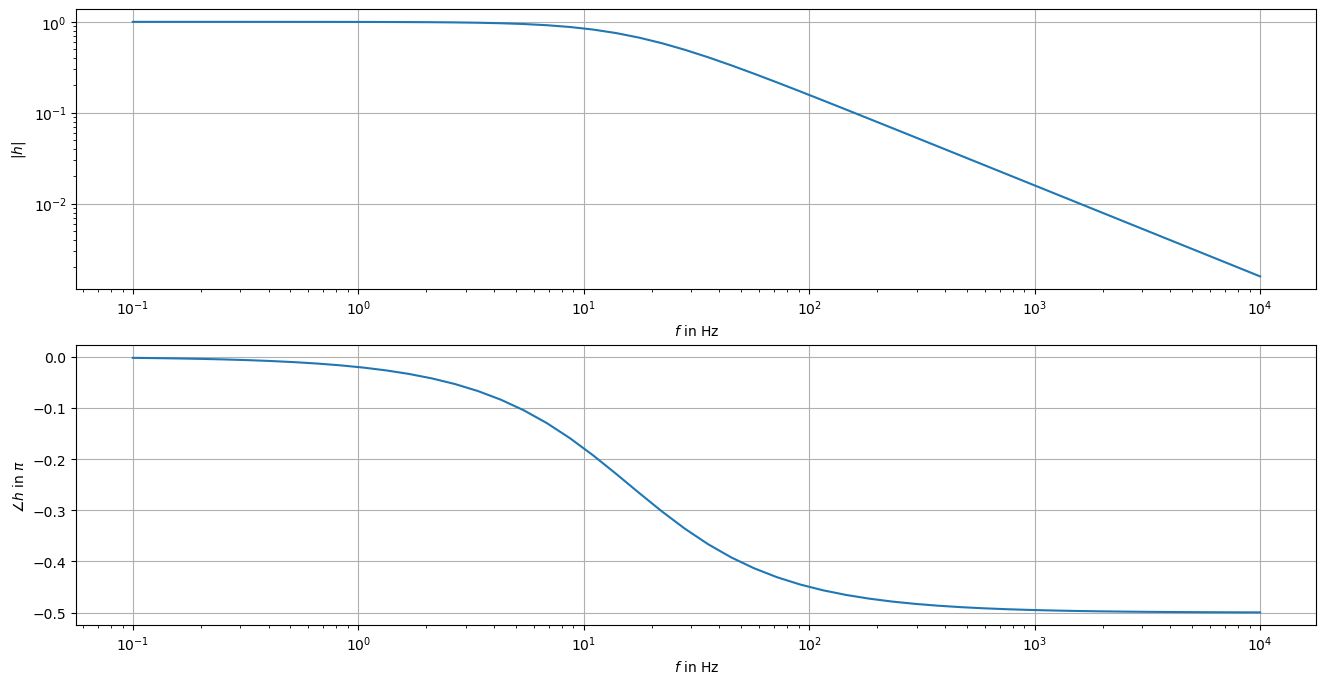

In [21]:
fig10, [p_abs, p_ang] = plt.subplots(2,1,figsize=(16,8))
p_abs.loglog(f,abs(h))
p_abs.set_xlabel(r"$f$ in Hz")
p_abs.set_ylabel(r"$|h|$")
p_abs.grid(True)

f_1 = 1/(R*C)/(2*pi)

p_ang.semilogx(f,angle(h)/pi)
p_ang.set_xlabel(r"$f$ in Hz")
p_ang.set_ylabel(r"$\angle h$ in $\pi$")
p_ang.grid(True)
plt.plot()

In [22]:
f_1

15.915494309189533

In [23]:
np.arccos(np.sqrt(1/2))/pi

0.25

## RL Circuit

## RLC Circuit in Series

## RLC Ciruit in Parallel

## DRAFT, TO BE DONE

In [24]:
r = 1
z = r*exp(1j*phi)
o = np.zeros(z.shape) # origin

NameError: name 'phi' is not defined

* https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_ComplexNumbers.html

In [ ]:
start = 0.+0.j
c = 2.*exp(pi/4.j)

In [ ]:
def plot_cx_arrow_xy(ax, cx, cx_from=0, color="k", linestyle="-", width=1):
    from numpy import real, imag
#    this_color = line[0].get_color() if color is None else color
    ax.plot([real(cx_from),real(cx)], [imag(cx_from),imag(cx)], color, linewidth=width, linestyle=linestyle)
    ax.annotate('', xytext=(real(cx_from),imag(cx_from)), xy=(real(cx),imag(cx)),
                arrowprops=dict(facecolor=color, edgecolor=color, headlength=10*width, headwidth=6*width, shrink=0.999, width=0))
    return

In [ ]:
def plot_cx_angle_wedge(ax, cx, cx_from=0, r=0.5, color="k"):
    from matplotlib.patches import Wedge
    from numpy import real, imag, pi, rad2deg, angle
    
    wedge = Wedge((0, 0), r, angle(cx_from, deg=True), angle(cx, deg=True), ec="none", alpha=0.4)
    ax.add_patch(wedge)
    return

In [ ]:
fig6,ax6 = plt.subplots(figsize=(3,3), dpi = 136)

cx1=4+2j
cx2=-2-3j

plot_cx_arrow_xy(ax6, cx1, width=1, color="r")
plot_cx_arrow_xy(ax6, cx2, color="b")

plot_cx_angle_wedge(ax6, cx2, cx1, r=1)

axlim = 3.

ax6.set_xlim(-axlim,axlim)
ax6.set_ylim(-axlim,axlim)
ax6.grid(True)
plt.plot()

In [ ]:
fig7,(ax71, ax72) = plt.subplots(1,2,figsize=(16,4), width_ratios=[1, 2.5])
ax71.set_aspect('equal', 'box')
#ax71.set_aspect('equal')

cx1=4.+2.j
cx2=-2.-3.j

cx1r=real(cx1)

plot_cx_arrow_xy(ax71, cx1, width=1, color="r")
plot_cx_arrow_xy(ax71, real(cx1), color="r", linestyle="--")

plot_cx_arrow_xy(ax71, cx2, color="b")
plot_cx_arrow_xy(ax71, real(cx2), color="b", linestyle="--")

#plot_cx_angle_wedge(ax71, cx2, cx1, r=1)
plot_cx_angle_wedge(ax71, cx1, r=1)

axlim = 5
ax71.set_xlim(-axlim,axlim)
ax71.set_ylim(-axlim,axlim)

ax71.grid(True)

plt.plot()

In [ ]:
fig3,ax3 = plt.subplots(figsize=(4,4), dpi = 136)
#ax3.plot(real(z), imag(z), ".")
ax3.plot([o,real(z)], [o,imag(z)], ".-")
ax3.grid(True)
plt.plot()

In [ ]:
def plot_polar_vector(c, label=None, color=None, start=0, linestyle='-'):
    # plot line in polar plane
    line = plt.polar([np.angle(start), np.angle(c)], [np.abs(start), np.abs(c)], label=label, 
                     color=color, linestyle=linestyle)
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start), np.abs(start)), xy=(np.angle(c), np.abs(c)),
                 arrowprops=dict(facecolor=this_color, edgecolor='none', 
                                 headlength=12, headwidth=10, shrink=1, width=0))

In [ ]:
#head_width=0.05, fc=color, ec=color, overhang=0.3, length_includes_head=True    
    
c_abs = 1.5
c_angle = 45  # in degree
c_angle_rad = np.deg2rad(c_angle) 
a = c_abs * np.cos(c_angle_rad)
b = c_abs * np.sin(c_angle_rad)
c1 = a + b*1j    
c2 = -0.5 + 0.75*1j

plt.figure(figsize=(6, 6))
plot_polar_vector(c1, label='$c_1$', color='k')
plot_polar_vector(np.conj(c1), label='$\overline{c}_1$', color='gray')
plot_polar_vector(c2, label='$c_2$', color='b')
plot_polar_vector(c1*c2, label='$c_1\cdot c_2$', color='r')
plot_polar_vector(c1/c2, label='$c_1/c_2$', color='g')

plot_polar_vector(c1, label=None, color=None, start=0+1j, linestyle='-')

plt.ylim([0, 1.8]);

In [ ]:
from ipywidgets.widgets import Label, FloatProgress, FloatSlider, Button, Dropdown
from ipywidgets.widgets import Layout, HBox, VBox
from IPython.display import display

## Time Varying Angles

In [ ]:
t = np.arange(0,5.00001, 0.1)

In [ ]:
f = 2. # frequency, cycles per second
omega = 2*pi*f #  ang. freq., how many 2*pi per second
phi = omega*t # time varying angle

In [ ]:
fig4, ax4 = plt.subplots(figsize=(6,4), dpi = 136)
ax4.plot(t, phi/(2*pi), ".")
ax4.set_xlabel("time $t$ in s")
ax4.set_ylabel("number of cycles")
ax4.grid(True)
plt.plot()

## STUFF

In [ ]:
XC = fXC(C,omega)
VC = fVC(t,V0,omega)
IC = VC/XC

In [ ]:
# XC = 1/(1j*omega*C)
# VC = fVC(t,V0,omega)
# IC = VC/XC
# #print(f"Ic:\n{Ic}")
# #print(f"Vc:\n{Vc}")

In [ ]:
fig8, ax8 = plt.subplots(figsize=(12,4), dpi = 136)
ax8.plot(t, real(VC), "-", label = r"$V_C(t)$")
ax8.plot(t, real(10*IC), "-", label = r"10*$I_C(t)$")
ax8.legend() 
ax8.set_xlabel(r"$t$ / s")
ax8.set_ylabel(r"amplitude")
ax8.set_title("AC Voltage and Current in a Pure Capacitor")
#ax5.set_xlim(0,4)
#ax5.set_ylim(-2,2)
ax8.grid(True)
#fig8.savefig("oscillations.png")
plt.plot()

In [ ]:
fig8, ax8 = plt.subplots(figsize=(12,4), dpi = 136)

ax8.plot(t, real(VC), "-", color = "tab:blue", label = r"$Voltage V_C(t)$")
ax8.set_xlabel(r"$t$ / s")
ax8.set_ylabel(r"Voltage $V_C$ in V")

ax8I=ax8.twinx()
#ax8I.plot(t, real(0.1*IC), "-", label = r"0.1*$I_C(t)$")
ax8I.plot(t, real(IC), "-", color = "tab:orange", label = r"Current $I_C(t)$")
ax8I.set_ylabel("Current $I_C$ in A")

ax8.legend() 
ax8I.legend() 

ax8.set_title("AC Voltage and Current in a Pure Capacitor: $\omega = 2\pi / \mathrm{s}$, $C = 1\,\mathrm{F}$, $V_0 = 1\,\mathrm{V}$")

ax8.grid(True, color="tab:blue", linestyle = "-")
ax8I.grid(True, color="tab:orange", linestyle = "-.")

#ax5.set_xlim(0,4)
#ax5.set_ylim(-2,2)
#fig8.savefig("oscillations.png")
plt.plot()